In [79]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
import random
import pandas as pd
import numpy as np 
from numpy import genfromtxt
import random 



In [64]:

def generate_colors(n): 
    rgb_values = [] 
    hex_values = [] 
    r = int(random.random() * 256) 
    g = int(random.random() * 256) 
    b = int(random.random() * 256) 
    step = 256 / n 
    for _ in range(n): 
        r += step 
        g += step 
        b += step 
        r = int(r) % 256 
        g = int(g) % 256 
        b = int(b) % 256 
        r_hex = hex(r)[2:] 
        g_hex = hex(g)[2:] 
        b_hex = hex(b)[2:] 
        hex_values.append('#' + r_hex + g_hex + b_hex) 
        rgb_values.append((r,g,b)) 
    return rgb_values, hex_values 
    
# generate values and print them 
rgb_values, hex_values = generate_colors(23) 
print (hex_values) 
    
# show generated colors 


['#b2c0eb', '#bdcbf6', '#c8d61', '#d3e1c', '#deec17', '#e9f722', '#f422d', '#ffd38', '#a1843', '#15234e', '#202e59', '#2b3964', '#36446f', '#414f7a', '#4c5a85', '#576590', '#62709b', '#6d7ba6', '#7886b1', '#8391bc', '#8e9cc7', '#99a7d2', '#a4b2dd']


In [65]:

f = "/home/kepler42/EE494/EE494/merged.csv"
df = pd.read_csv(f,sep=',')
print(df)

      Unnamed: 0      0    1   2   3   4
0              0    0.0  500 -41 -45 -55
1              1    0.0  500 -41 -45 -57
2              2    0.0  500 -41 -43 -55
3              3    0.0  500 -45 -43 -57
4              4    0.0  500 -45 -43 -55
...          ...    ...  ...  ..  ..  ..
5745        5745  327.0  731 -41 -47 -45
5746        5746  327.0  731 -41 -47 -45
5747        5747  327.0  731 -41 -45 -45
5748        5748  327.0  731 -39 -45 -47
5749        5749  327.0  731 -41 -47 -45

[5750 rows x 6 columns]


In [67]:

df["x_y"] = (df["0"].apply(str) + df["1"].apply(str)).astype("string")
df

,Unnamed: 0,0,1,2,3,4,x_y
0,0,0.0,500,-41,-45,-55,0.0500
1,1,0.0,500,-41,-45,-57,0.0500
2,2,0.0,500,-41,-43,-55,0.0500
3,3,0.0,500,-45,-43,-57,0.0500
4,4,0.0,500,-45,-43,-55,0.0500
...,...,...,...,...,...,...,...
5745,5745,327.0,731,-41,-47,-45,327.0731
5746,5746,327.0,731,-41,-47,-45,327.0731
5747,5747,327.0,731,-41,-45,-45,327.0731
5748,5748,327.0,731,-39,-45,-47,327.0731


In [68]:
unique = df.x_y.unique()

In [86]:
#df['c'] = df.x_y.map({0:colors[0], 1:colors[1], 2:colors[2]})
colors = {}
for i,j in enumerate(unique):
    colors[j] = i+1
print(colors)

{'0.0500': 1, '90.0500': 2, '0.0375': 3, '0.0250': 4, '200.5625': 5, '187.1125': 6, '90.0731': 7, '200.5250': 8, '0.0125': 9, '157.50': 10, '250.5375': 11, '200.5375': 12, '284.0500': 13, '90.0625': 14, '90.0125': 15, '90.0250': 16, '90.00': 17, '316.6625': 18, '90.0375': 19, '200.5731': 20, '200.5500': 21, '0.00': 22, '327.0731': 23}


In [89]:
df['c']=df['x_y'].map(colors)
df

,Unnamed: 0,0,1,2,3,4,x_y,c
0,0,0.0,500,-41,-39,-45,0.0500,1
1,1,0.0,500,-31,-45,-45,0.0500,1
2,2,0.0,500,-39,-47,-45,0.0500,1
3,3,0.0,500,-47,-41,-37,0.0500,1
4,4,0.0,500,-33,-47,-45,0.0500,1
...,...,...,...,...,...,...,...,...
5745,5745,327.0,731,-41,-47,-45,327.0731,23
5746,5746,327.0,731,-47,-39,-31,327.0731,23
5747,5747,327.0,731,-35,-45,-47,327.0731,23
5748,5748,327.0,731,-35,-43,-45,327.0731,23


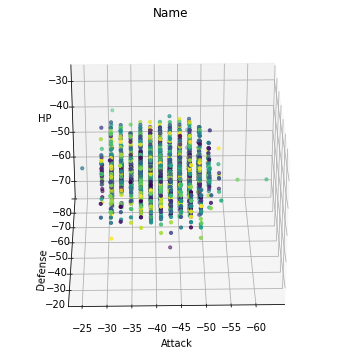

In [88]:


fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(131, projection='3d')

# x_y = np.asarray(df['1'] )
sequence_containing_x_vals = np.asarray(df['2'] )
sequence_containing_y_vals = np.asarray(df['3'] )
sequence_containing_z_vals = np.asarray(df['4'] )

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)


ax.scatter(df['2'], df['3'], df['4'],c=df.c, s=10)
ax.set_title('Name')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
for angle in range(0,90): 
    ax.view_init(30,angle)
plt.show()